In [8]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

## Data Overview

- Observations
- Sanity checks

In [11]:
data.shape

(340, 15)

* The dataset has 340 rows and 15 columns

In [13]:
# Viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


* The dataset was loaded successfully.

In [15]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* The dataset has a mix of object, float, and int data types.

In [17]:
# Check for duplicate observations
data.duplicated().sum()

0

* The dataset has no duplicates

In [19]:
# Checking for missing values in the data
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* The dataset has no missing values

In [21]:
# Checking statistical summary of the dataset
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


##### Observations of statistical summary
* The Ticker Symbol and Security columns contain only unique values and provide no benefit for our modeling; therefore, they can be dropped.
* Current price avarage among all stocks is $80.
* Earnings Per Share ranges between -61.2 and 50.09 with avarage 2.77
  

In [23]:
# Creating a copy of the dataset to avoid any changes to original data
df = data.copy()

## Exploratory Data Analysis (EDA)

#### Univarate analisys

In [27]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

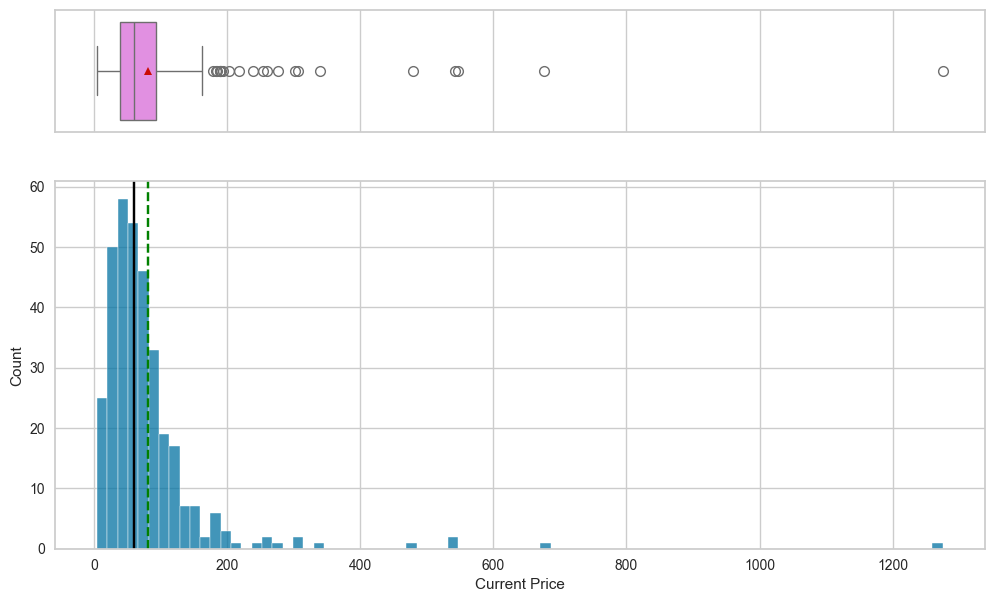

In [29]:
# Creating histogram_boxplot for 'Current Price'
histogram_boxplot(df, 'Current Price')

* Some outliers are present on the right side of the boxplot for the Current Price feature. The histplot shows that the data is skewed to the right, with the median marked around 60-70.

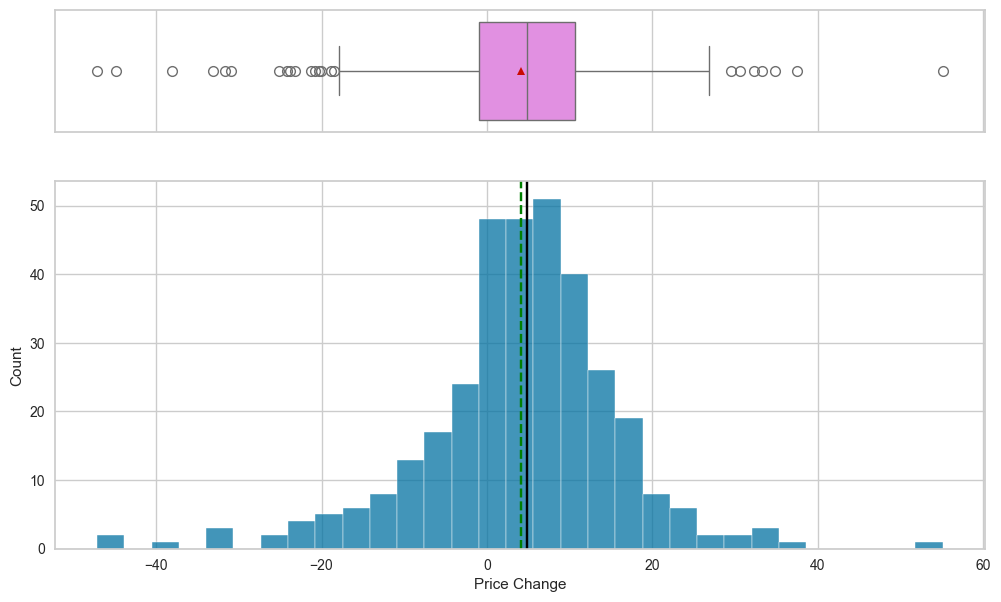

In [31]:
# Creating histogram_boxplot for 'Price Change'
histogram_boxplot(df, 'Price Change')

* For Price Change, we can see that outliers are present on both sides of the boxplot. The histplot looks close to normally distributed, with the median around 5.

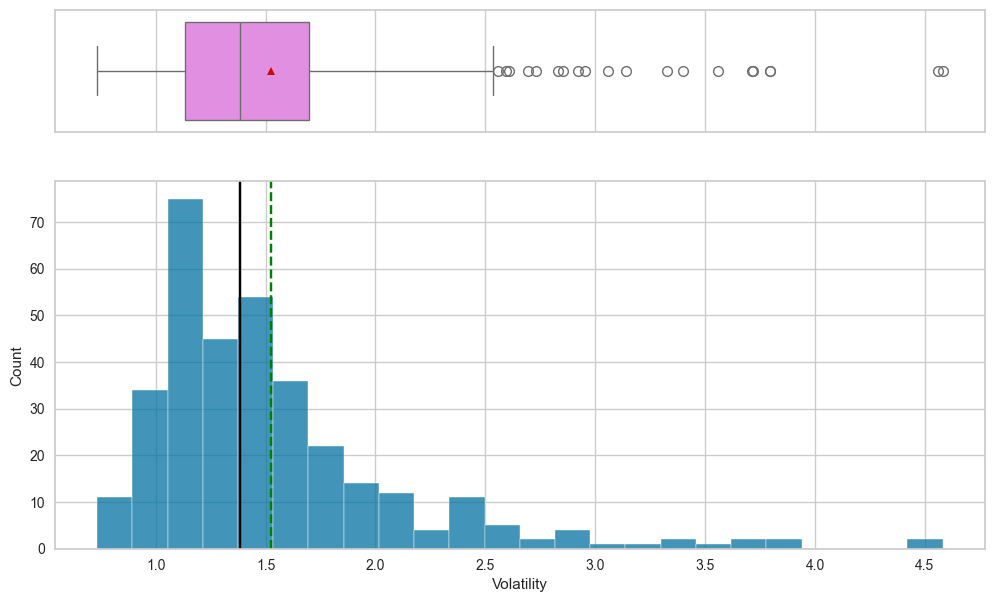

In [33]:
# Creating histogram_boxplot for 'Volatility'
histogram_boxplot(df, 'Volatility')

* Volatility data is skewed to the right, as we can see in the histplot, and there are also outliers on the right side of the boxplot. The median is around 1,4

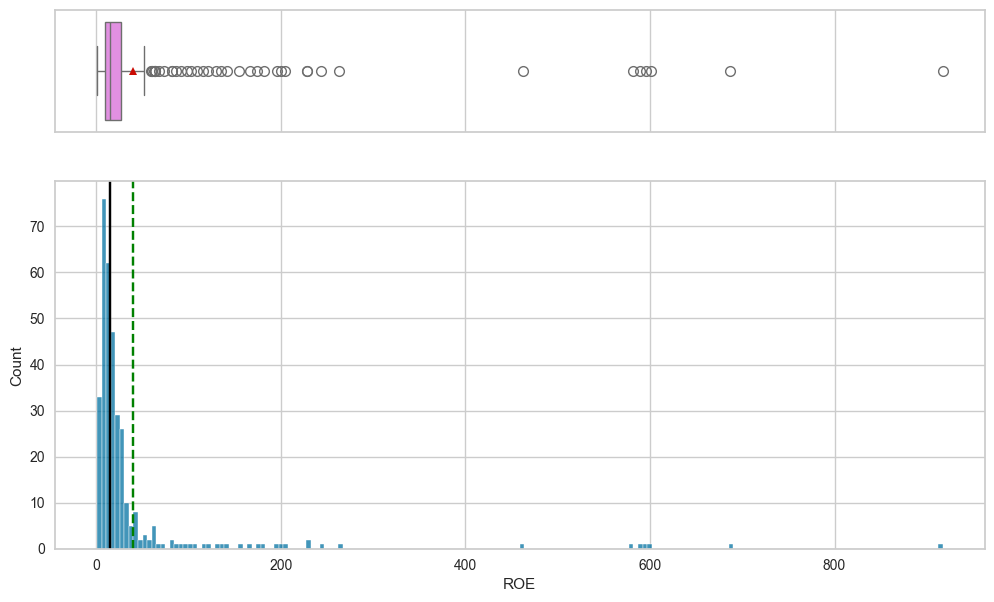

In [35]:
# Creating histogram_boxplot for 'ROE'
histogram_boxplot(df, 'ROE')

* The ROE is heavily skewed to the right, with many outliers on the right side of the boxplot. The median is at 15.

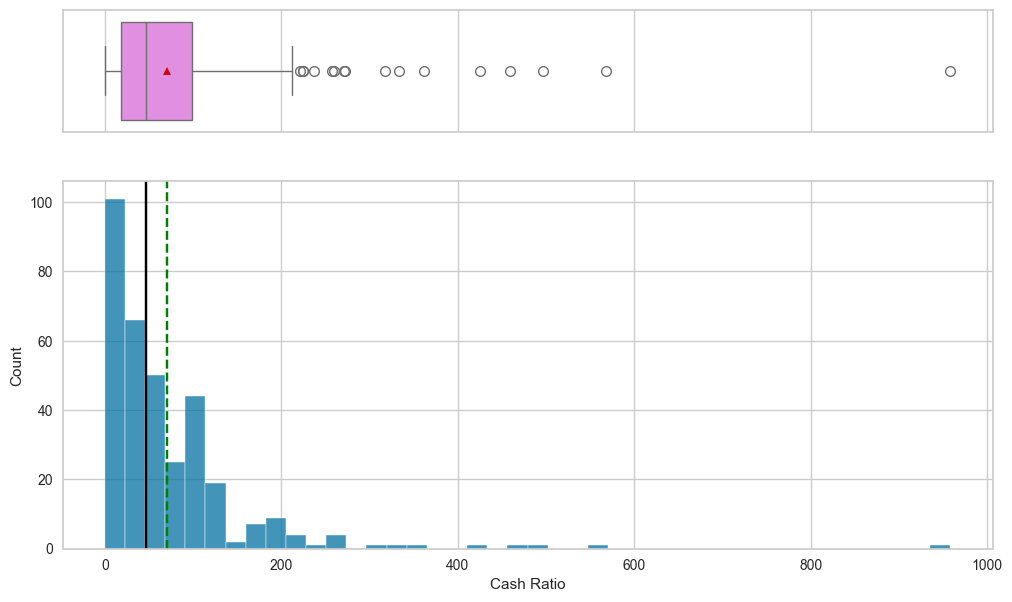

In [37]:
# Creating histogram_boxplot for 'Cash Ratio'
histogram_boxplot(df, 'Cash Ratio')

* The cash ratio feature exhibits some outliers on the right side in the boxplot and shows right skewness in the histplot, with the median approximately at 50.

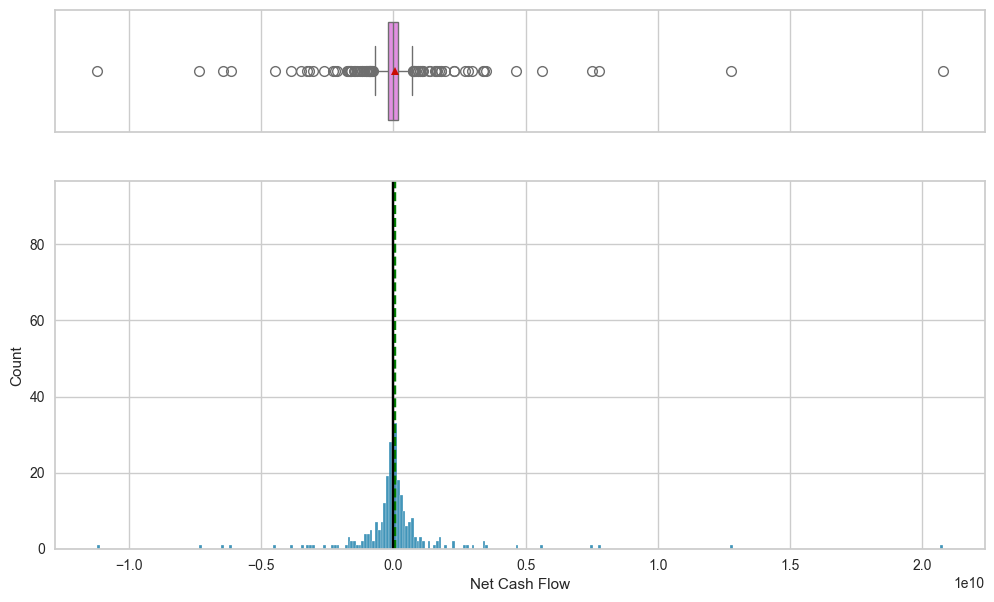

In [39]:
# Creating histogram_boxplot for 'Net Cash Flow'
histogram_boxplot(df, 'Net Cash Flow')

* The net cash flow feature displays numerous outliers on both sides of the boxplot. The histplot appears to be close to normally distributed. Additionally, the range of net cash flow is quite large, spanning from approximately -11,208,000,000 to 20,764,000,000 dollars.

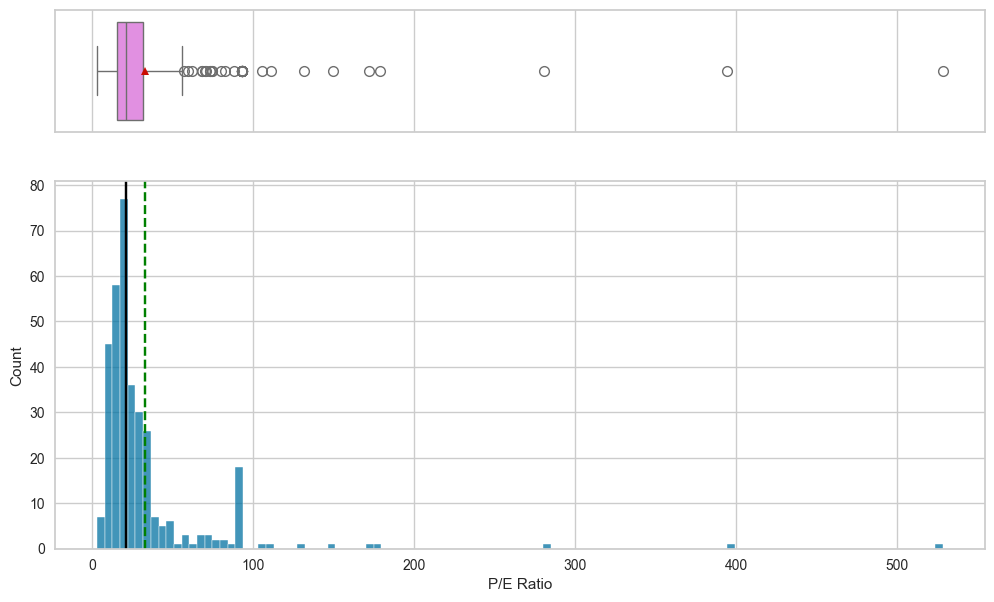

In [41]:
# Creating histogram_boxplot for 'P/E Ratio'
histogram_boxplot(df, 'P/E Ratio')

* The boxplot for the P/E ratio shows many outliers on the right side of the whisker. The histplot is skewed to the right, with the median approximately at 20.

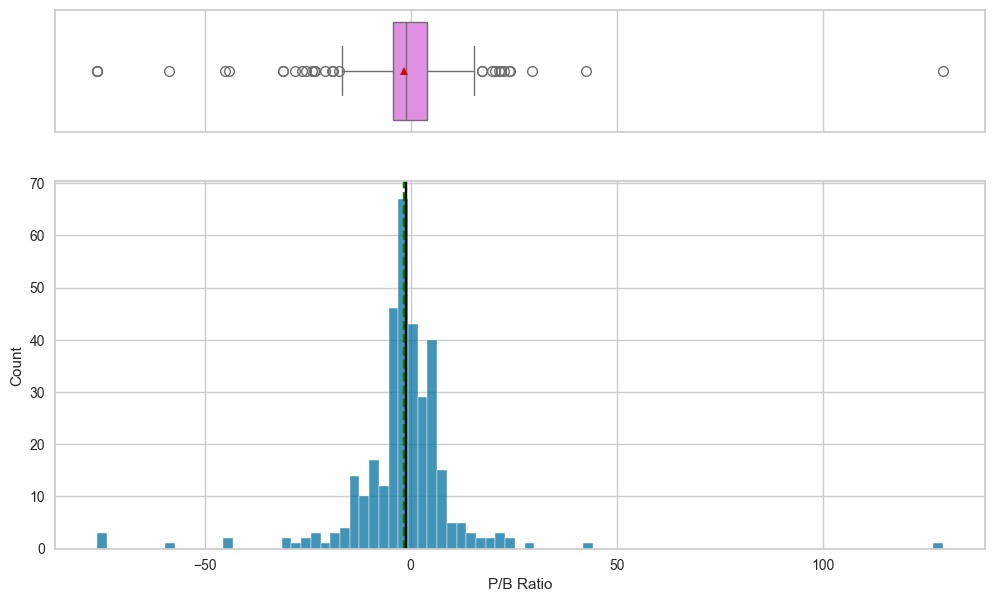

In [43]:
# Creating histogram_boxplot for 'P/B Ratio'
histogram_boxplot(df, 'P/B Ratio')

* The P/B ratio data reveals multiple outliers on both sides of the boxplot. The histplot shape is approximately normally distributed, with long tails on either side, and the median is close to zero.

In [45]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top.

    Parameters:
    df: DataFrame
    feature: DataFrame column
    perc: Whether to display percentages instead of count (default is False)
    n: Displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # Length of the column

    # Limit to the top 15 categories if n is not specified
    if n is None:
        n = 15  # Default to 15 categories

    plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

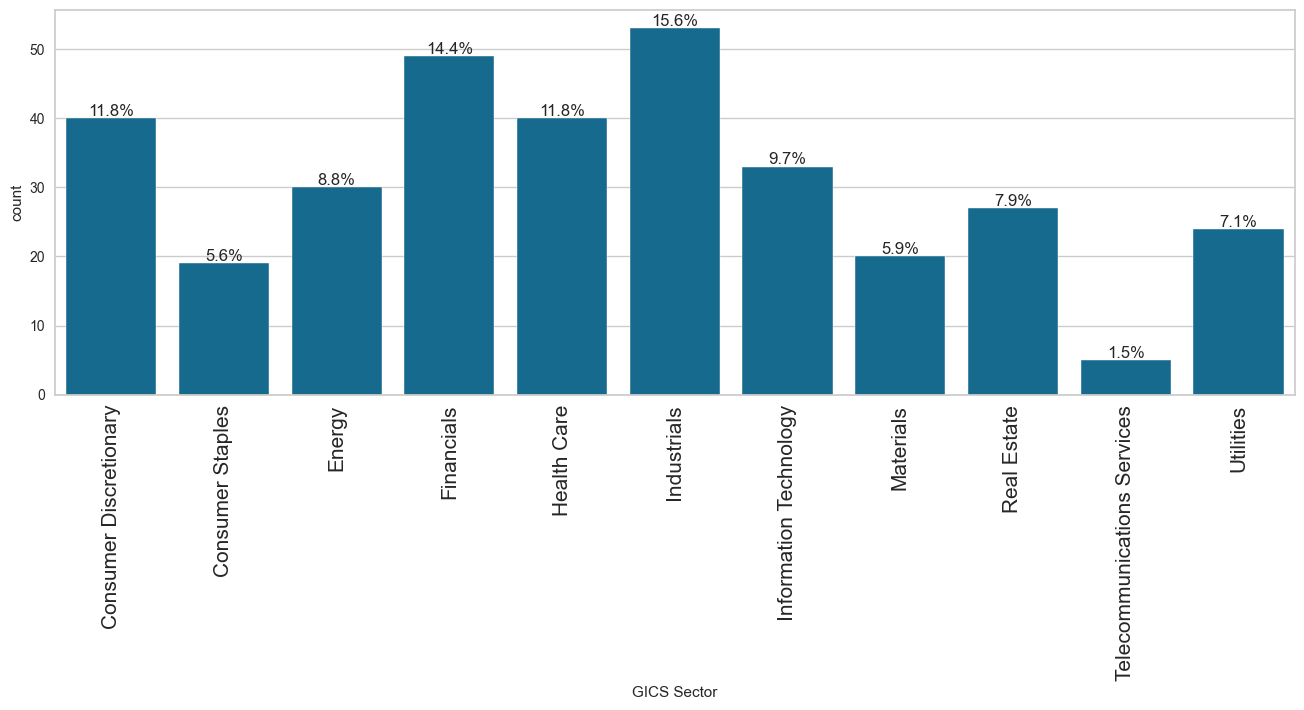

In [46]:
# Creating a labelled barplot for 'GICS Sector'
labeled_barplot(df, 'GICS Sector', perc=True)

* The bar plot above indicates that the largest percentage of companies belongs to the industrials sector, at 15.6%. This is followed by the financials sector at 14.4%. The consumer discretionary and healthcare sectors share third place, each accounting for 11.8%.

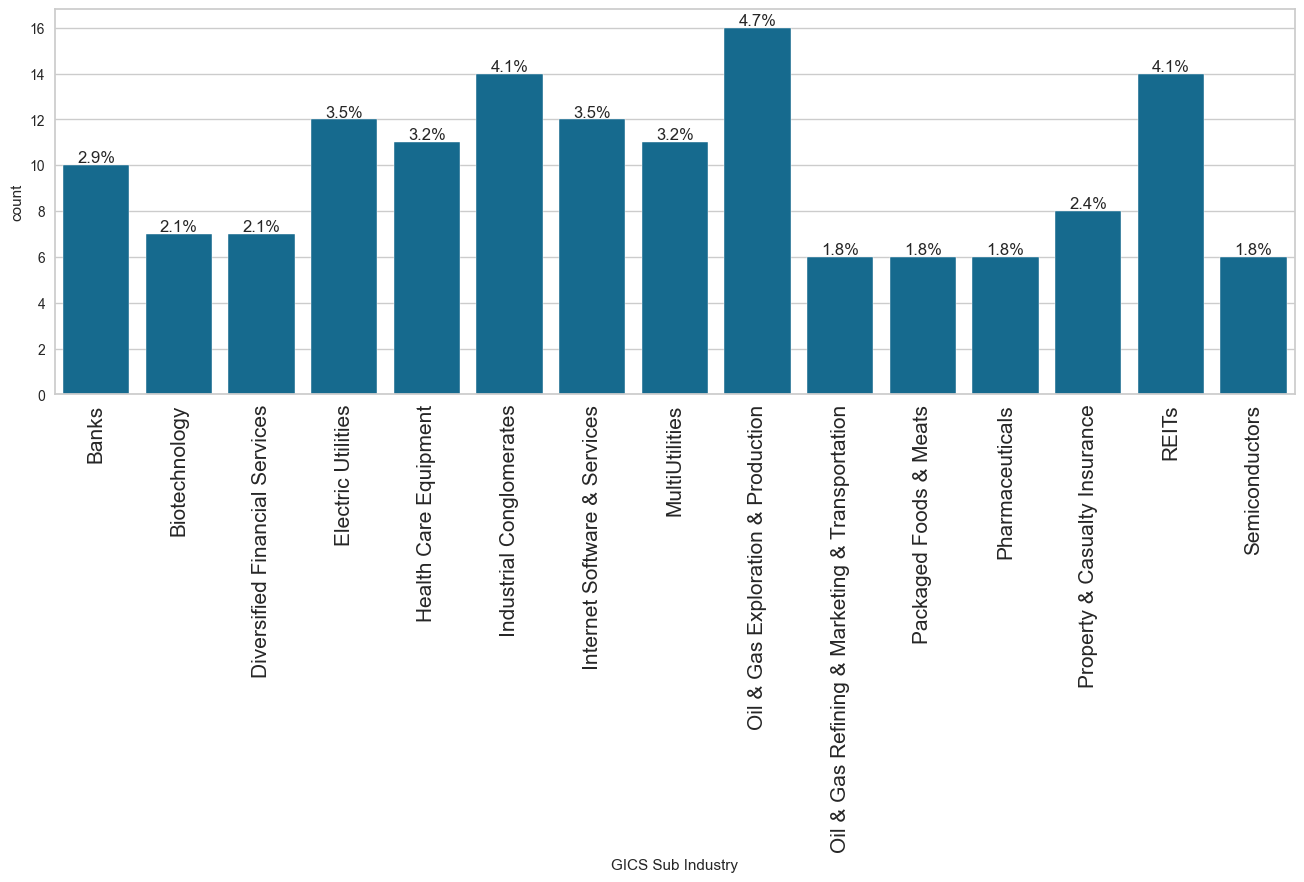

In [48]:
# Creating a labelled barplot for 'GICS Sub Industry'
labeled_barplot(df, 'GICS Sub Industry', perc=True)

* The leading sub-industry in the dataset is Oil and Gas Exploration and Production, comprising 4.7% of all companies. In second place, Industrial Conglomerates and Real Estate Investment Trusts (REITs) are tied, each accounting for 4.1%. Third place is shared by Electric Utilities and Multiutilities, with both representing 3.5% of the total companies.

#### Bivariate Analysis

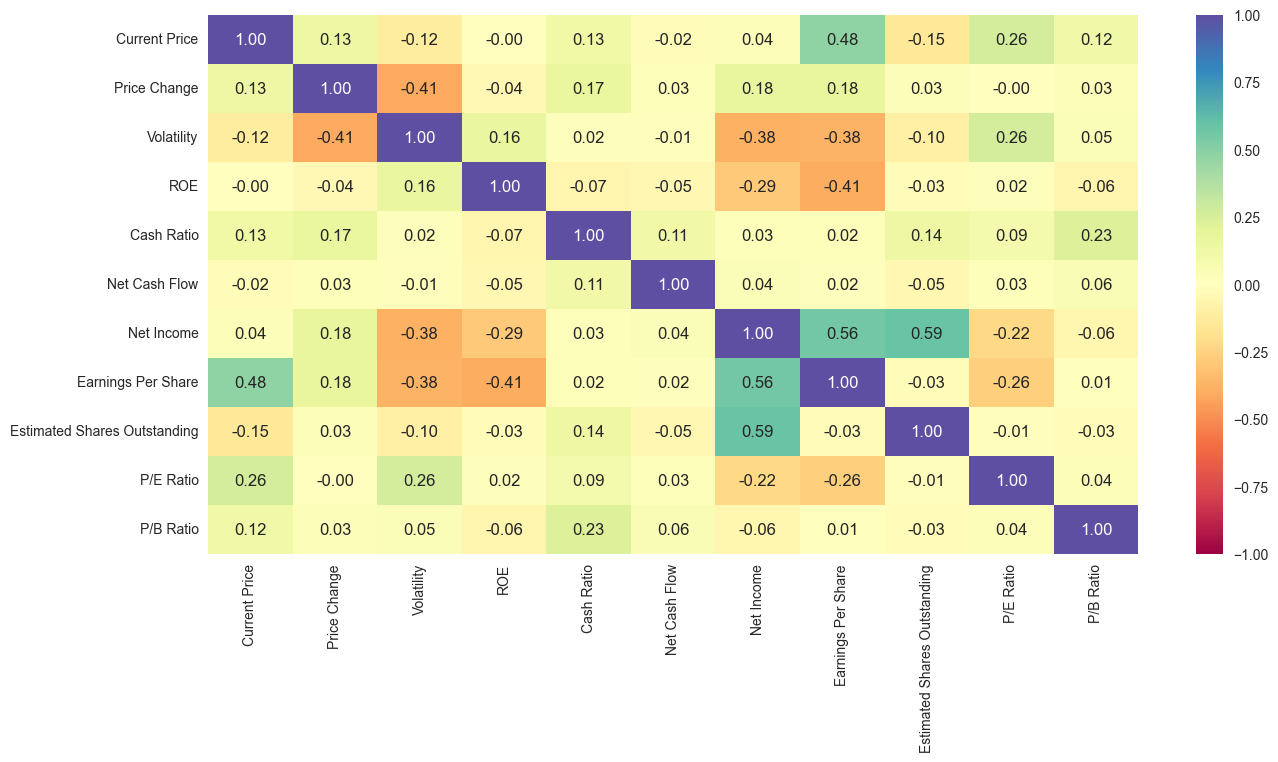

In [51]:
# Checking corrolation map
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### From the correlation map, we can observe the following:

* The strongest correlation is between estimated shares outstanding and net income.
* The second strongest correlation is between EPS and net income.
* The third strongest correlation is between EPS and current price.

On the negative side, the highest negative correlation is between EPS and return on equity (ROE). The second highest negative correlations are between net income and volatility, as well as between EPS and volatility. Finally, the third highest negative correlation is between net income and ROE.

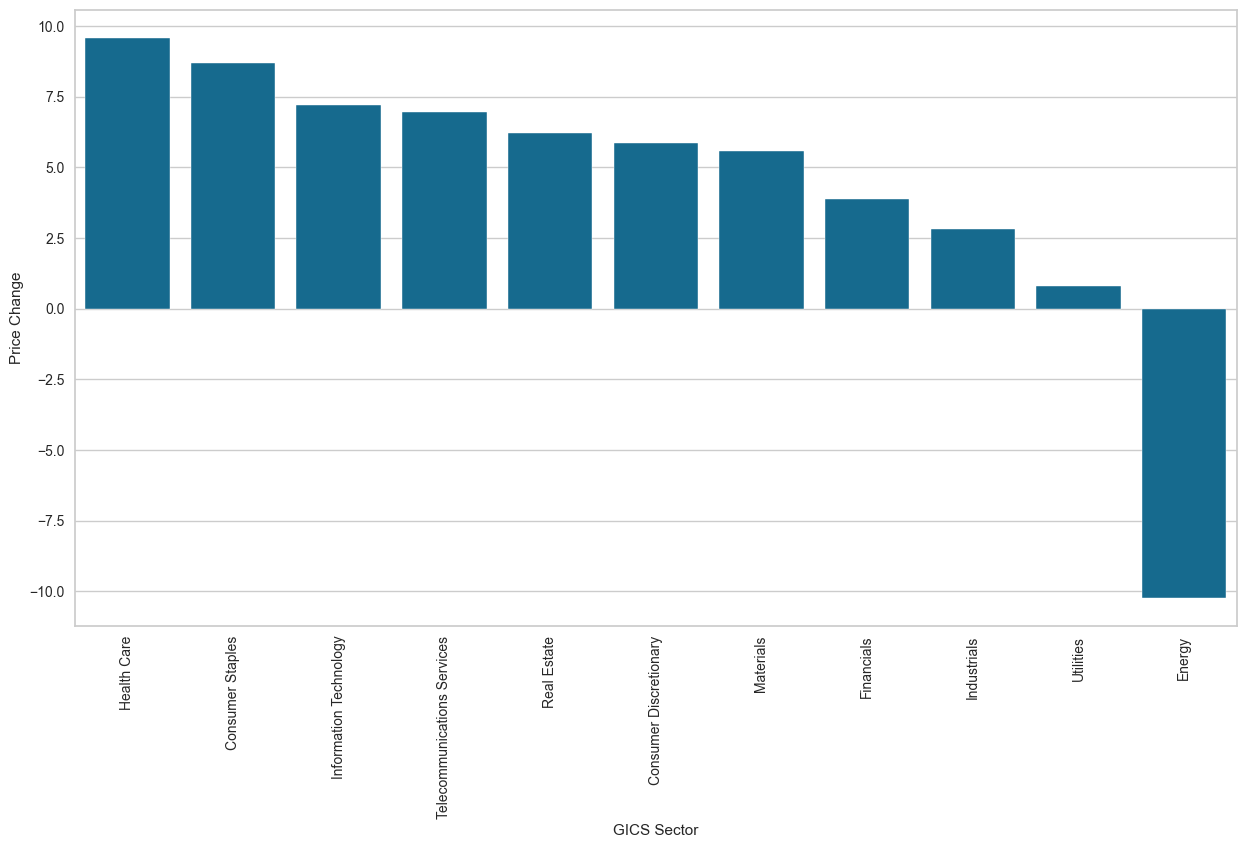

In [53]:
# Checking the stocks of which economic sector have seen the maximum price increase on average

# Group by GICS Sector and calculate the average price change
avg_price_change = df.groupby('GICS Sector')['Price Change'].mean().reset_index()

# Sort the sectors by average price change in descending order
avg_price_change = avg_price_change.sort_values(by='Price Change', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=avg_price_change, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

* From the visualization above, we can see that the healthcare, consumer staples, and information technology sectors have experienced the highest average price increases.

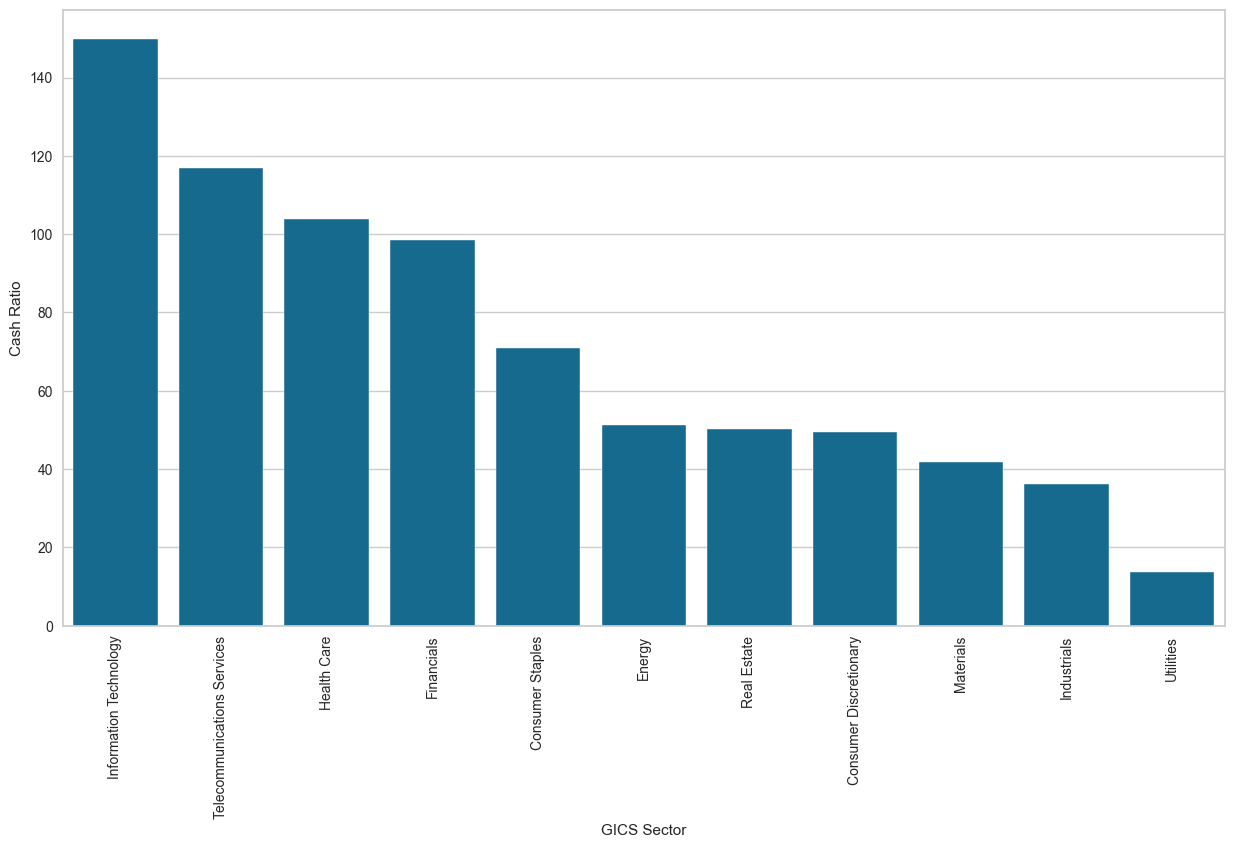

In [55]:
# Checking average cash ratio across economic sectors.

# Group by GICS Sector and calculate the average cash ratio
avg_cash_ratio = df.groupby('GICS Sector')['Cash Ratio'].mean().reset_index()

# Sort the sectors by average cash ratio in descending order
avg_cash_ratio = avg_cash_ratio.sort_values(by='Cash Ratio', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=avg_cash_ratio, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

* From the graph above, we can see that the sectors with the highest cash and cash equivalent reserves are information technology, followed by telecommunications services and health care.

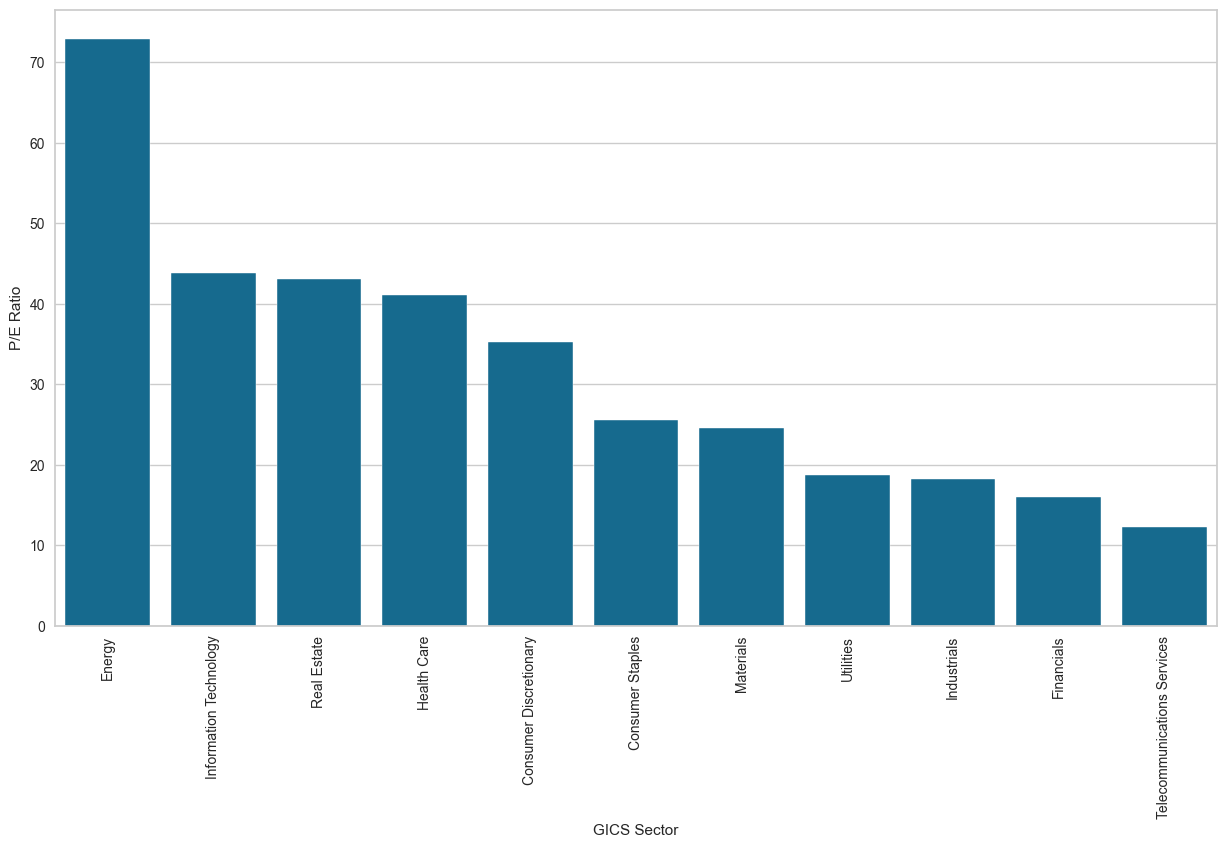

In [57]:
# Checking P/E ratio across economic sectors.

# Group by GICS Sector and calculate the average P/E ratio
avg_pe_ratio = df.groupby('GICS Sector')['P/E Ratio'].mean().reset_index()

# Sort the sectors by average P/E ratio in descending order
avg_pe_ratio = avg_pe_ratio.sort_values(by='P/E Ratio', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=avg_pe_ratio, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

* From the graph above, we can see that energy, information technology, and real estate are the sectors with the highest P/E ratio. 

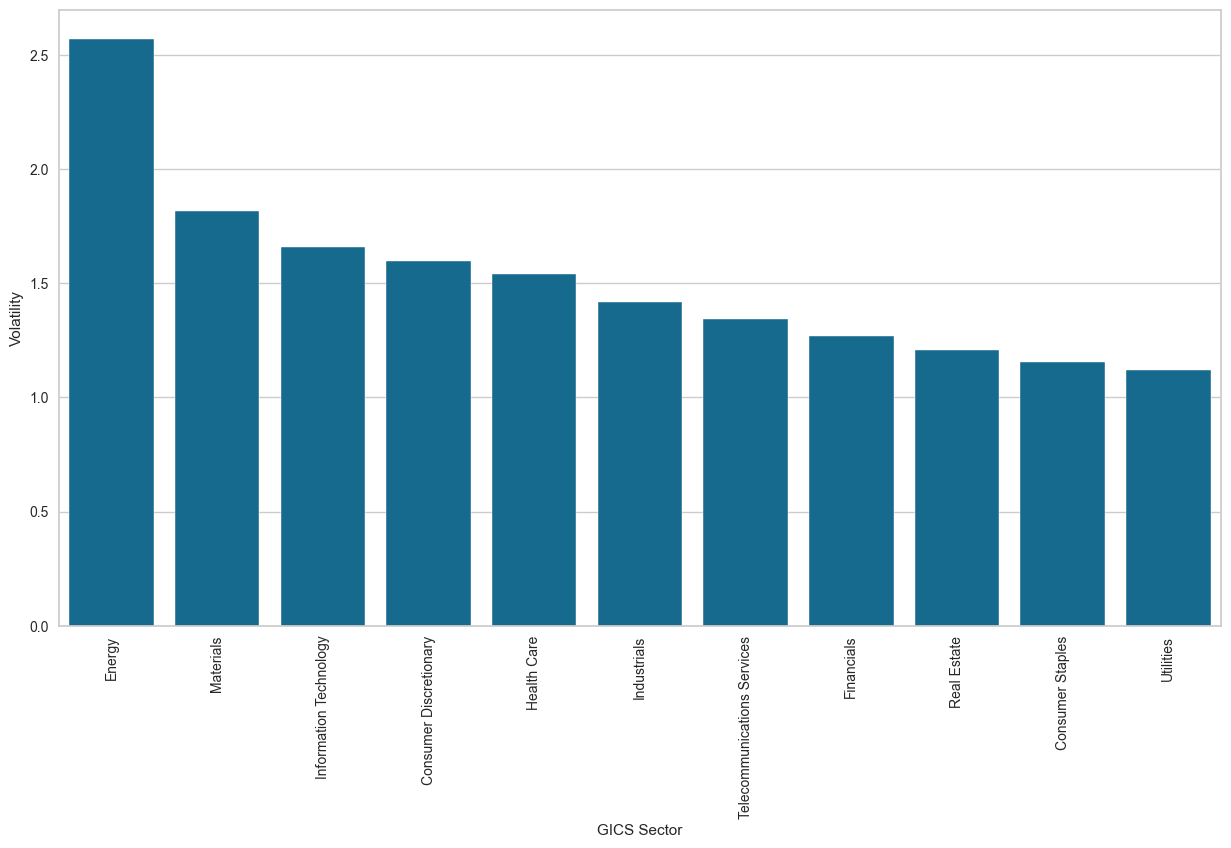

In [59]:
# Checking the Volatility across economic sectors

# Group by GICS Sector and calculate the average volatility
avg_volatility = df.groupby('GICS Sector')['Volatility'].mean().reset_index()

# Sort the sectors by average volatility in descending order
avg_volatility = avg_volatility.sort_values(by='Volatility', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=avg_volatility, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

* From the visualization above, we can see that the sectors with the highest volatility are energy, materials, and information technology.

## Data Preprocessing


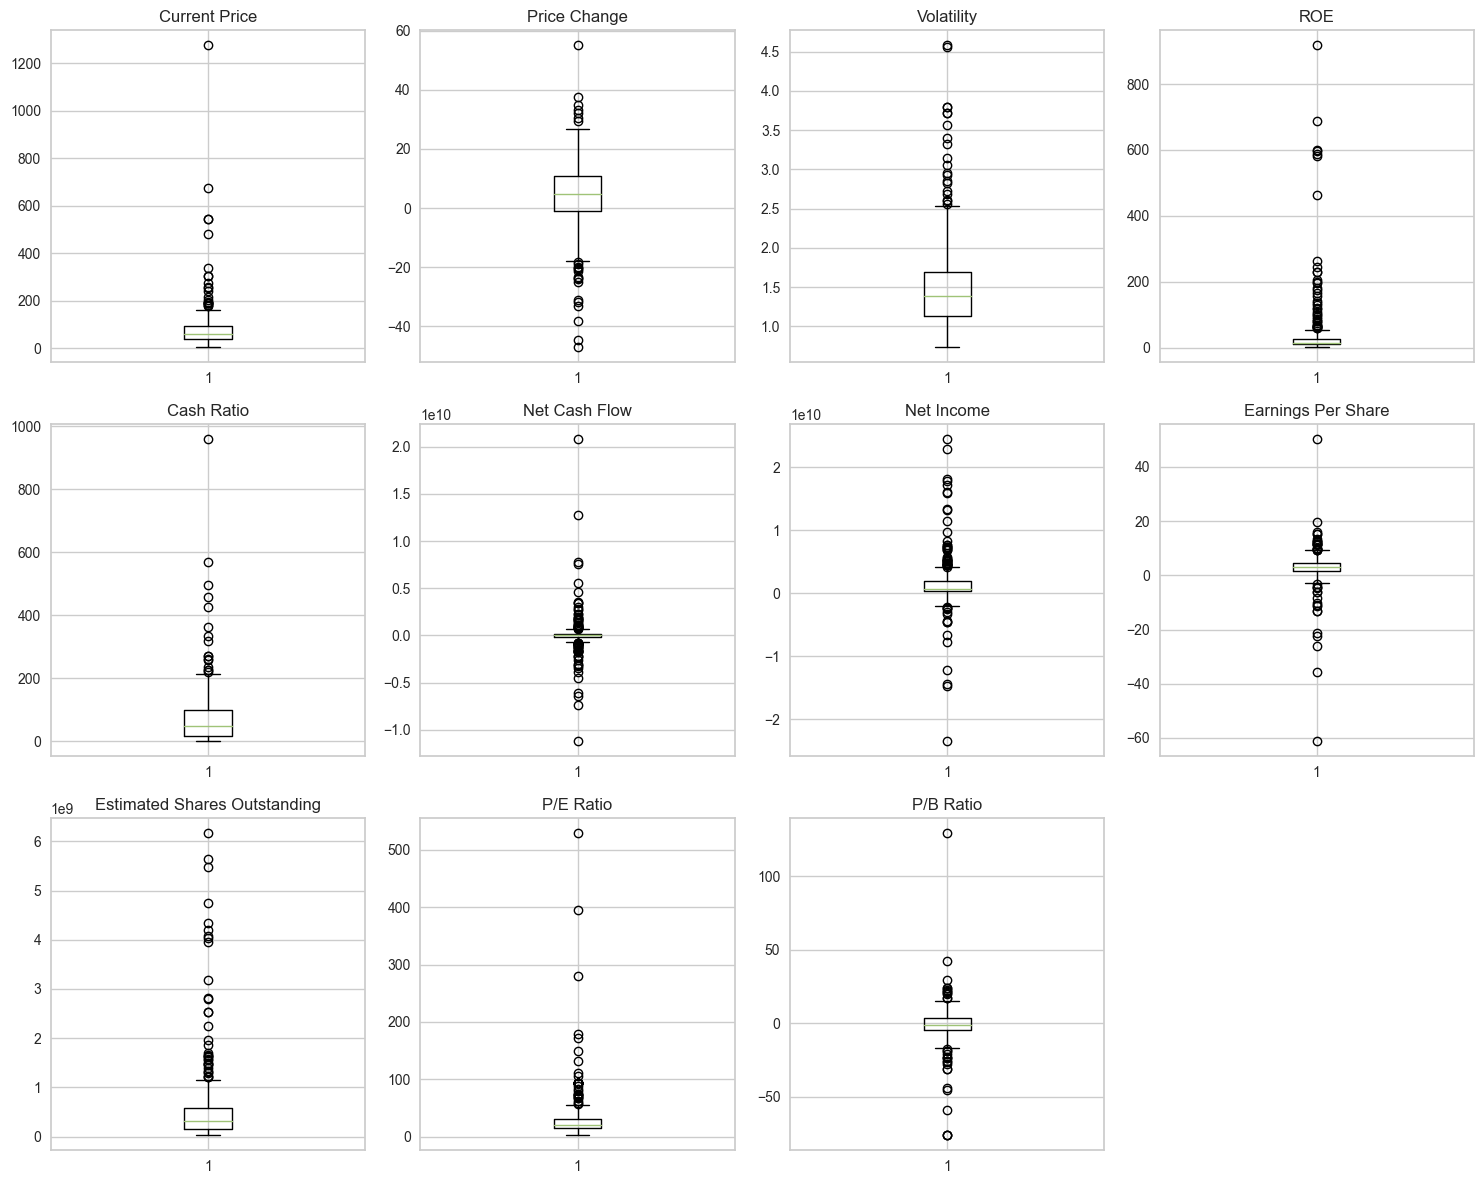

In [62]:
# Checkng outliers in all numerical columns

plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* From the graph above, we can see that all numerical columns have outliers; however, we will not treat them, as they all appear to be real values.

In [64]:
# Scaling the data before clustering
scaler = StandardScaler()
subset = df[['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']]
subset_scaled = scaler.fit_transform(subset)

In [65]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [67]:
# Checking manipulated data
subset_scaled_df.sample(n=10, random_state=1)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,-0.499050,-1.631230,2.365301,1.715701,-0.000261,0.398488,-4.053625,-5.826417,-0.201806,1.365673,0.251239
125,0.243055,1.013134,-0.347539,-0.327752,9.834905,0.276029,0.552725,-0.222962,2.632871,1.067680,0.545140
11,-0.417036,0.291977,-0.613684,-0.255142,-0.255000,-0.017350,-0.316615,-0.191038,-0.489464,-0.141747,0.032189
248,-0.014833,0.549047,-1.218289,-0.234396,0.653202,0.053947,-0.218163,0.076517,-0.101393,-0.192904,-0.038612
238,-0.135351,-0.267995,0.107532,-0.078803,-0.066714,-0.331123,-2.369738,-1.977272,0.222909,1.365673,0.363059
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
112,-0.293454,-2.112992,1.419644,-0.389989,1.450648,0.240939,-0.358182,-0.336977,-0.503120,1.365673,0.809258
147,-0.478214,-0.765718,0.744737,-0.369243,1.317740,3.977596,-0.550379,-0.542204,0.322445,1.365673,1.366960
89,-0.278236,-0.035418,-0.619500,-0.203277,0.320933,1.148681,0.204002,0.359275,-0.154085,-0.500879,0.096248
173,-0.483934,0.249342,0.092841,-0.286260,-0.033488,0.183413,-0.133767,-0.078543,-0.176018,-0.401920,0.425693


* Data is scaled correctly and ready for clustering.

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


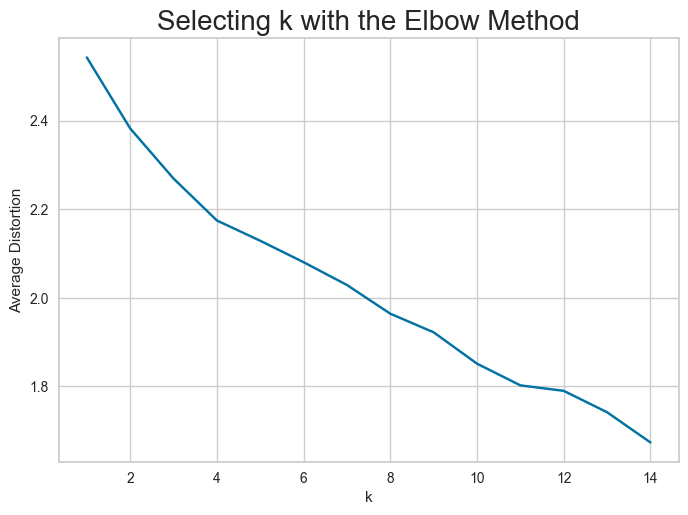

In [70]:
# Checking Elbow Plot
k_means_df = subset_scaled_df.copy()

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

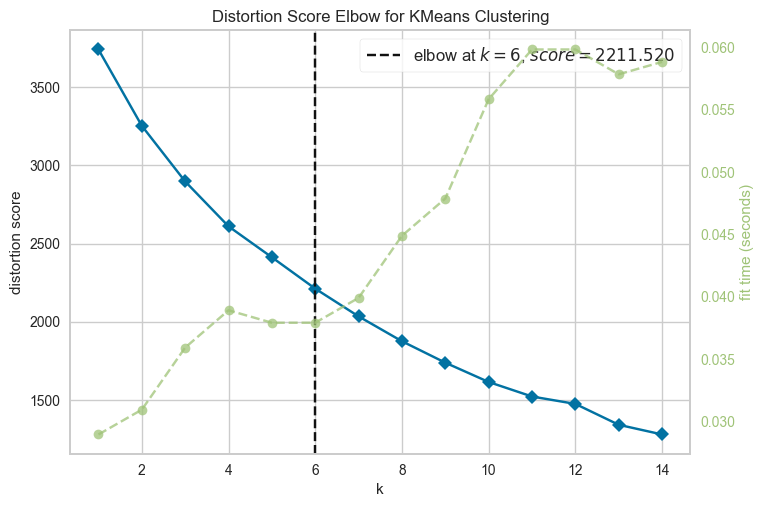

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* Appropriate value for k seems to be at 6

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


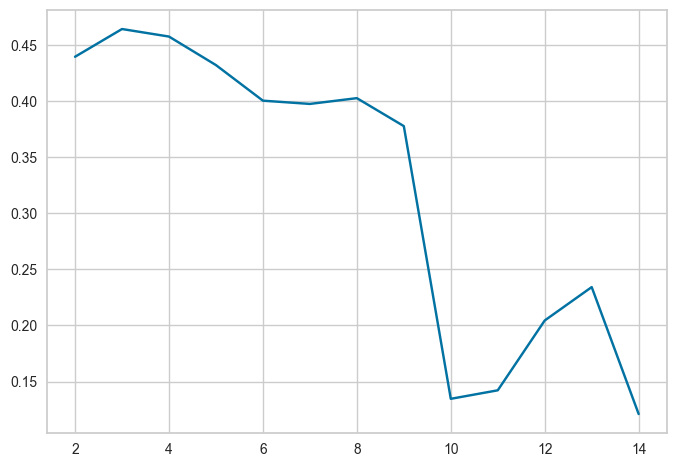

In [73]:
# Let's check the silhouette scores
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

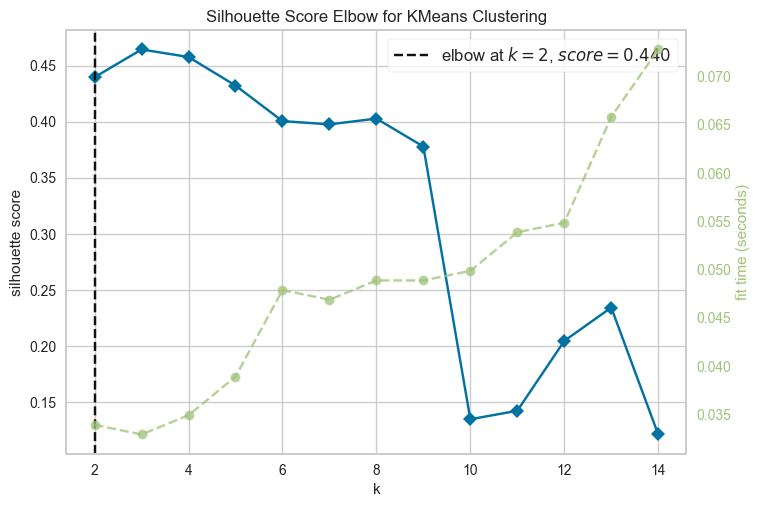

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [74]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  
visualizer.show() 

* From the graph above, we can see that 4 is a more reasonable number, considering it is much faster to fit the data and the score drops sharper after 4. 

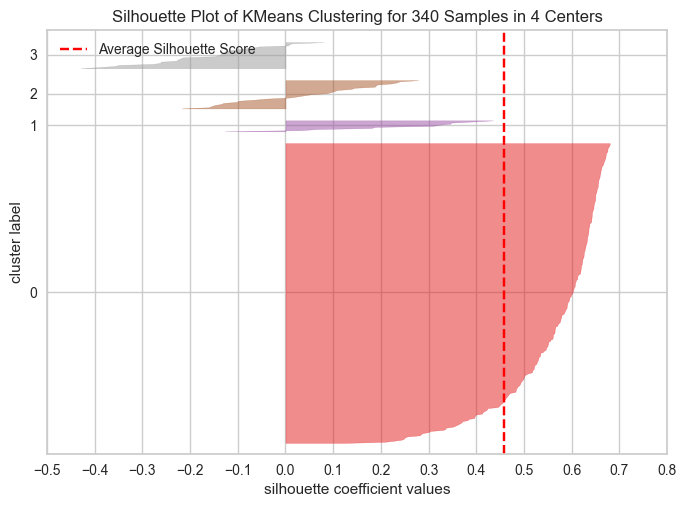

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [77]:
# Final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  # Specify the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [78]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [79]:
# Grouping by the cluster labels
km_cluster_profile = df1.groupby("KM_segments").mean()

In [80]:
# Counting the number of entries in each segment
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [81]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [82]:
# Printing the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [83]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

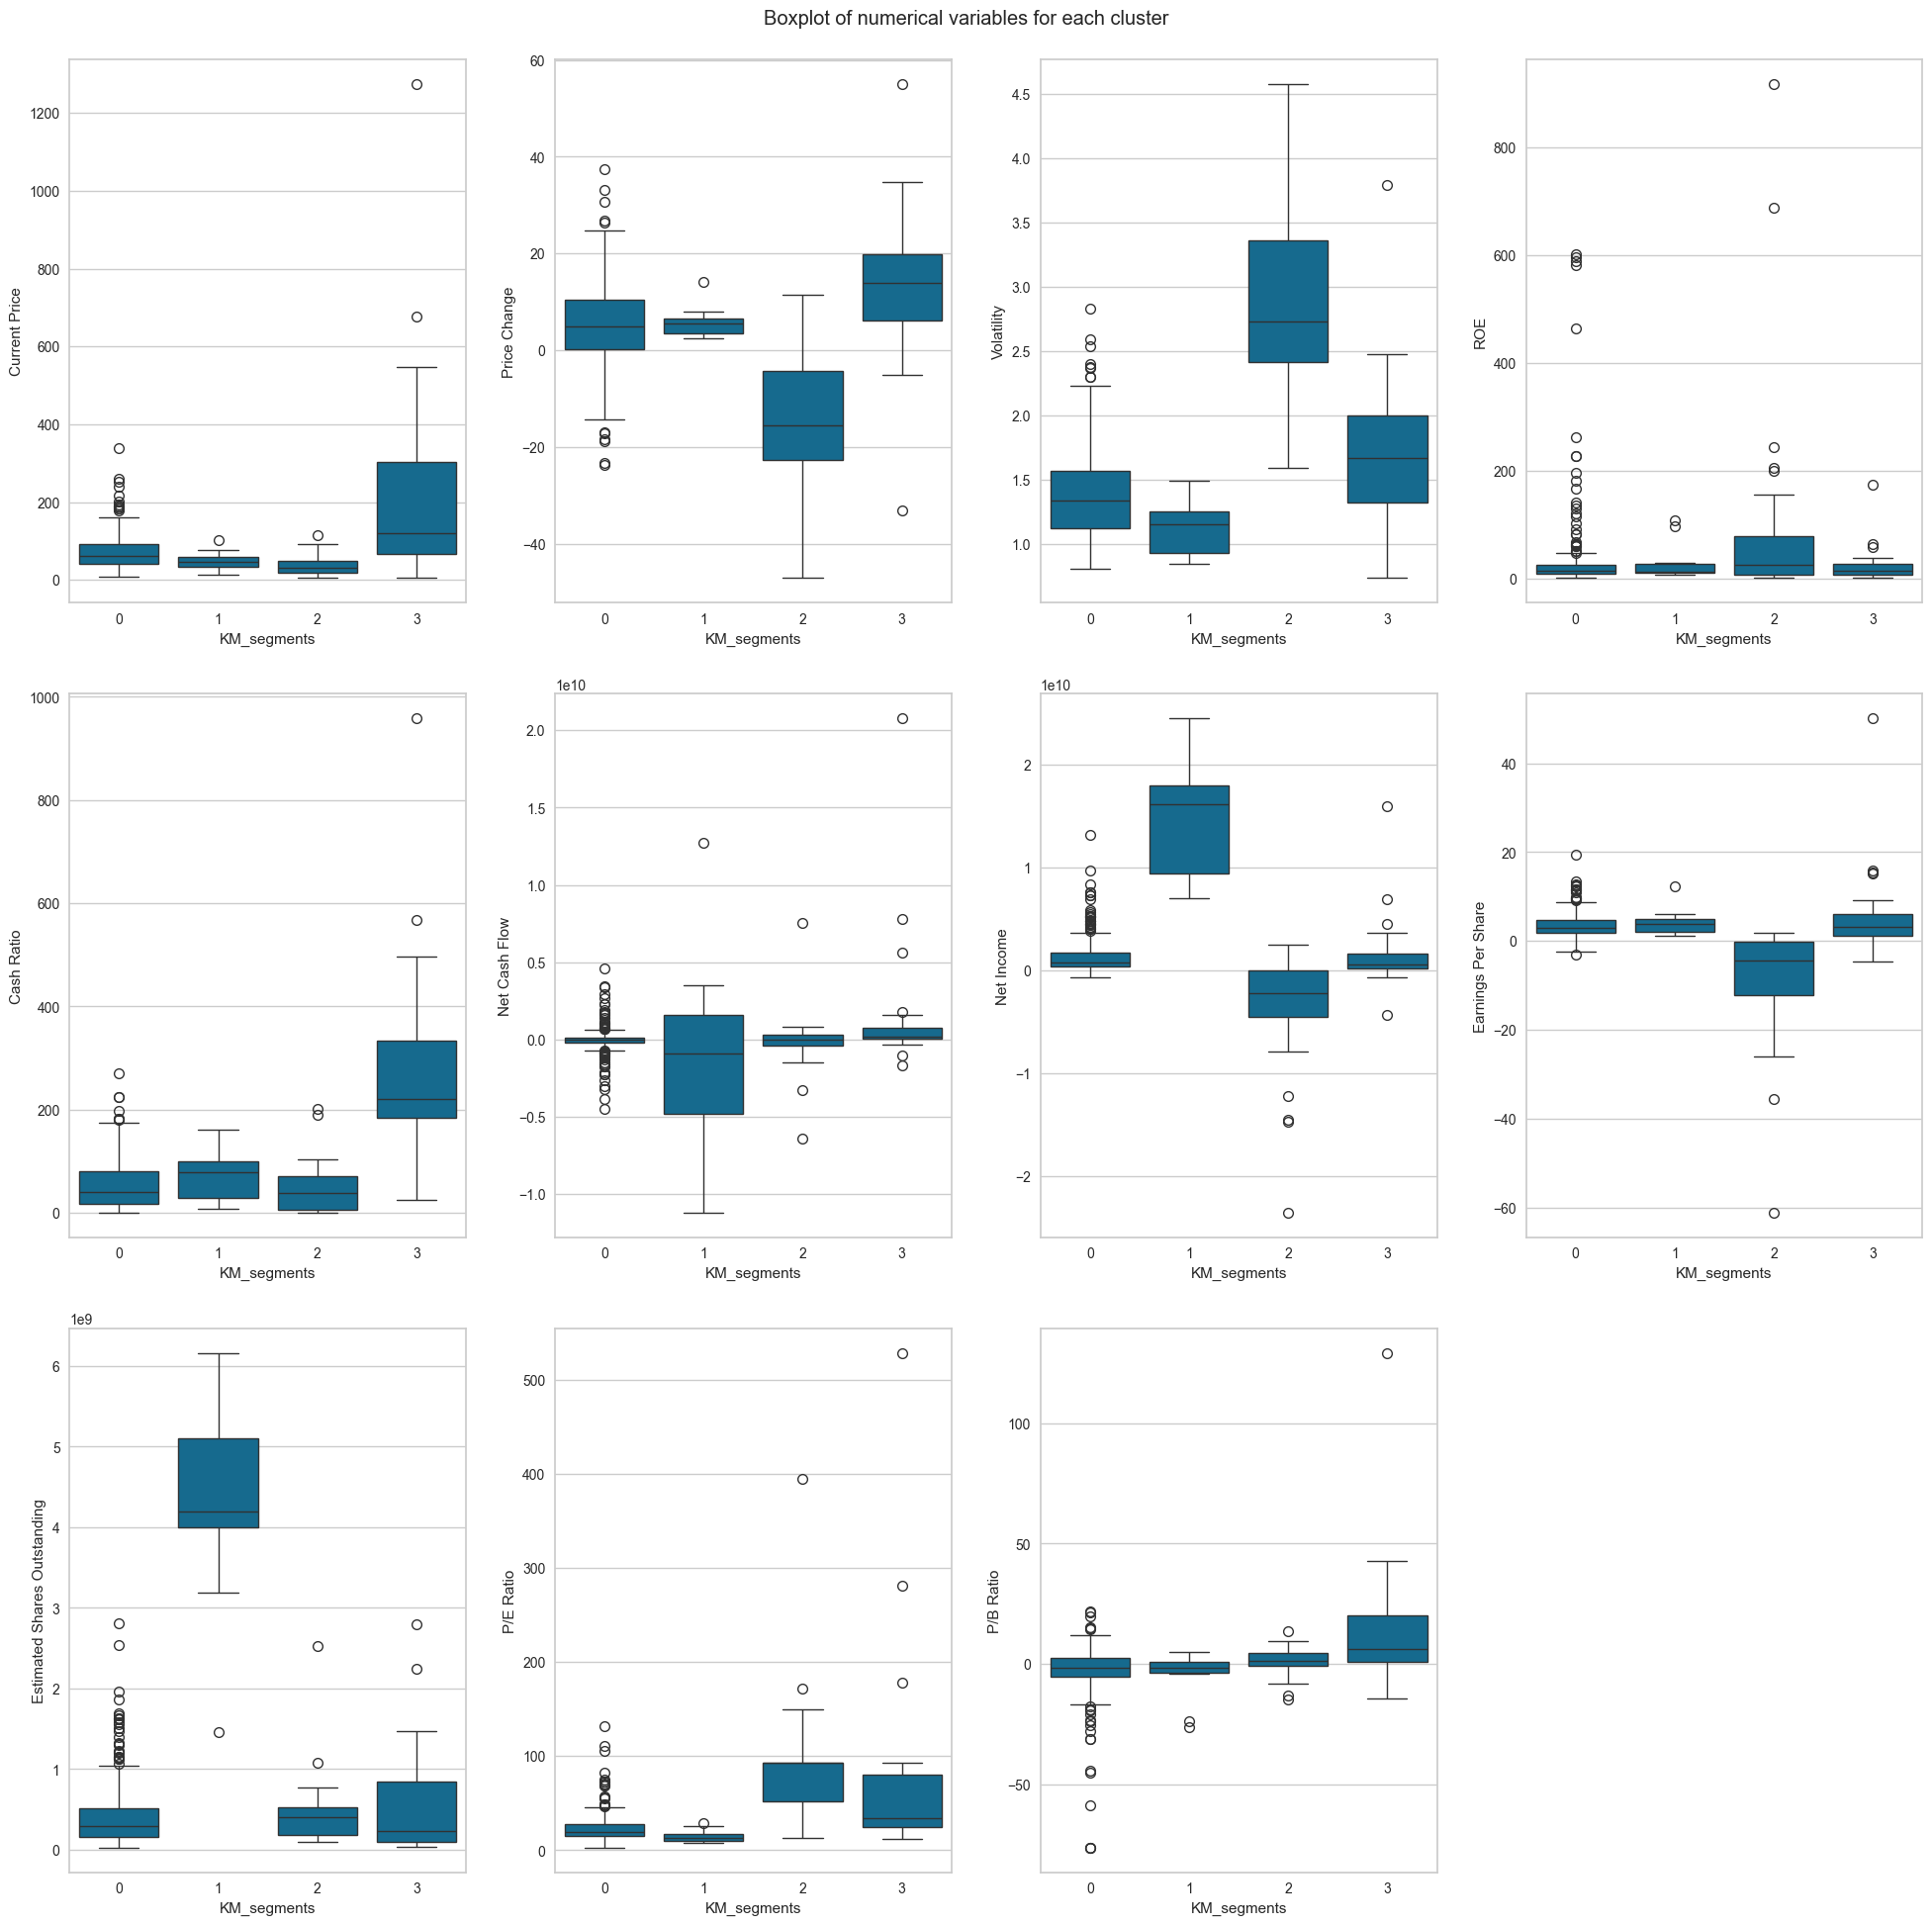

In [84]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

#### Cluster 0
* The largest cluster with 272 companies.
* This cluster has a moderate current price and a positive price change, indicating stable growth.
* The return on equity (ROE) of 35.16, with many outliers on the positive side, suggests effective management of shareholder funds, indicating profitability.
* With relatively low volatility, this cluster may appeal to conservative investors seeking stability.
* A net cash flow of approximately -$10.92 million in this cluster raises concerns about liquidity and the ability to sustain operations in the short term.

#### Cluster 1
* With only 11 companies in this cluster, it may represent niche opportunities or specialized sectors.
* A significant negative net income of about -$1.07 billion raises concerns about long-term viability and profitability.
* A cash ratio of 75.91 indicates strong liquidity, suggesting these companies can easily meet short-term liabilities.
* A price change of 5.75 indicates some growth, but it’s less impressive compared to other clusters.

#### Cluster 2
* The current price of $220.97 suggests these companies are well-valued in the market, indicating strong investor confidence.
* A notable price change of 13.33 indicates robust growth and potentially high investor interest.
* A P/E ratio of 73.72 suggests that investors are willing to pay a premium for future earnings, reflecting strong growth expectations.
* An EPS of 5.66 indicates profitability on a per-share basis, appealing to growth-oriented investors.
* An ROE of 24.11, while lower than some clusters, still indicates effective management but suggests less efficiency compared to Cluster 0.

#### Cluster 3
* With a current price of 36.25, this cluster has the lowest stock price, which may attract bargain hunters but also indicates potential risks.
* The price change of -14.48 signifies significant recent declines, suggesting underlying issues affecting performance.
* A volatility of 2.87 indicates that this cluster experiences sharp price fluctuations, marking it as a riskier investment.
* An impressive ROE of 96.90 suggests that these companies generate substantial returns on equity.
* However, a substantial negative net income of approximately -$3.47 billion raises serious concerns about financial health and sustainability.d sustainability.
  



## Hierarchical Clustering

In [88]:
# Computing Cophenetic Correlation
hc_df = subset_scaled_df.copy()

# list of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'minkowski', 'cosine']
# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
    
        if lm == 'ward' and dm != 'euclidean':
            continue
        try:
            Z = linkage(hc_df, metric=dm, method=lm)
            c, coph_dists = cophenet(Z, pdist(hc_df))
            print(
                "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                    dm.capitalize(), lm, c
                )
            )
            if high_cophenet_corr < c:
                high_cophenet_corr = c
                high_dm_lm[0] = dm
                high_dm_lm[1] = lm
        except Exception as e:
            print(f"Error with {dm} distance and {lm} linkage: {e}")

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Minkowski distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Minkowski distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Minkowski distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Cosine distance and single linkage is 0.16336378418310402.
Cophenetic correlation for 

In [89]:
# Let's explore different linkage methods with Euclidean distance only.

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for ward linkage is 0.7101180299865353.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


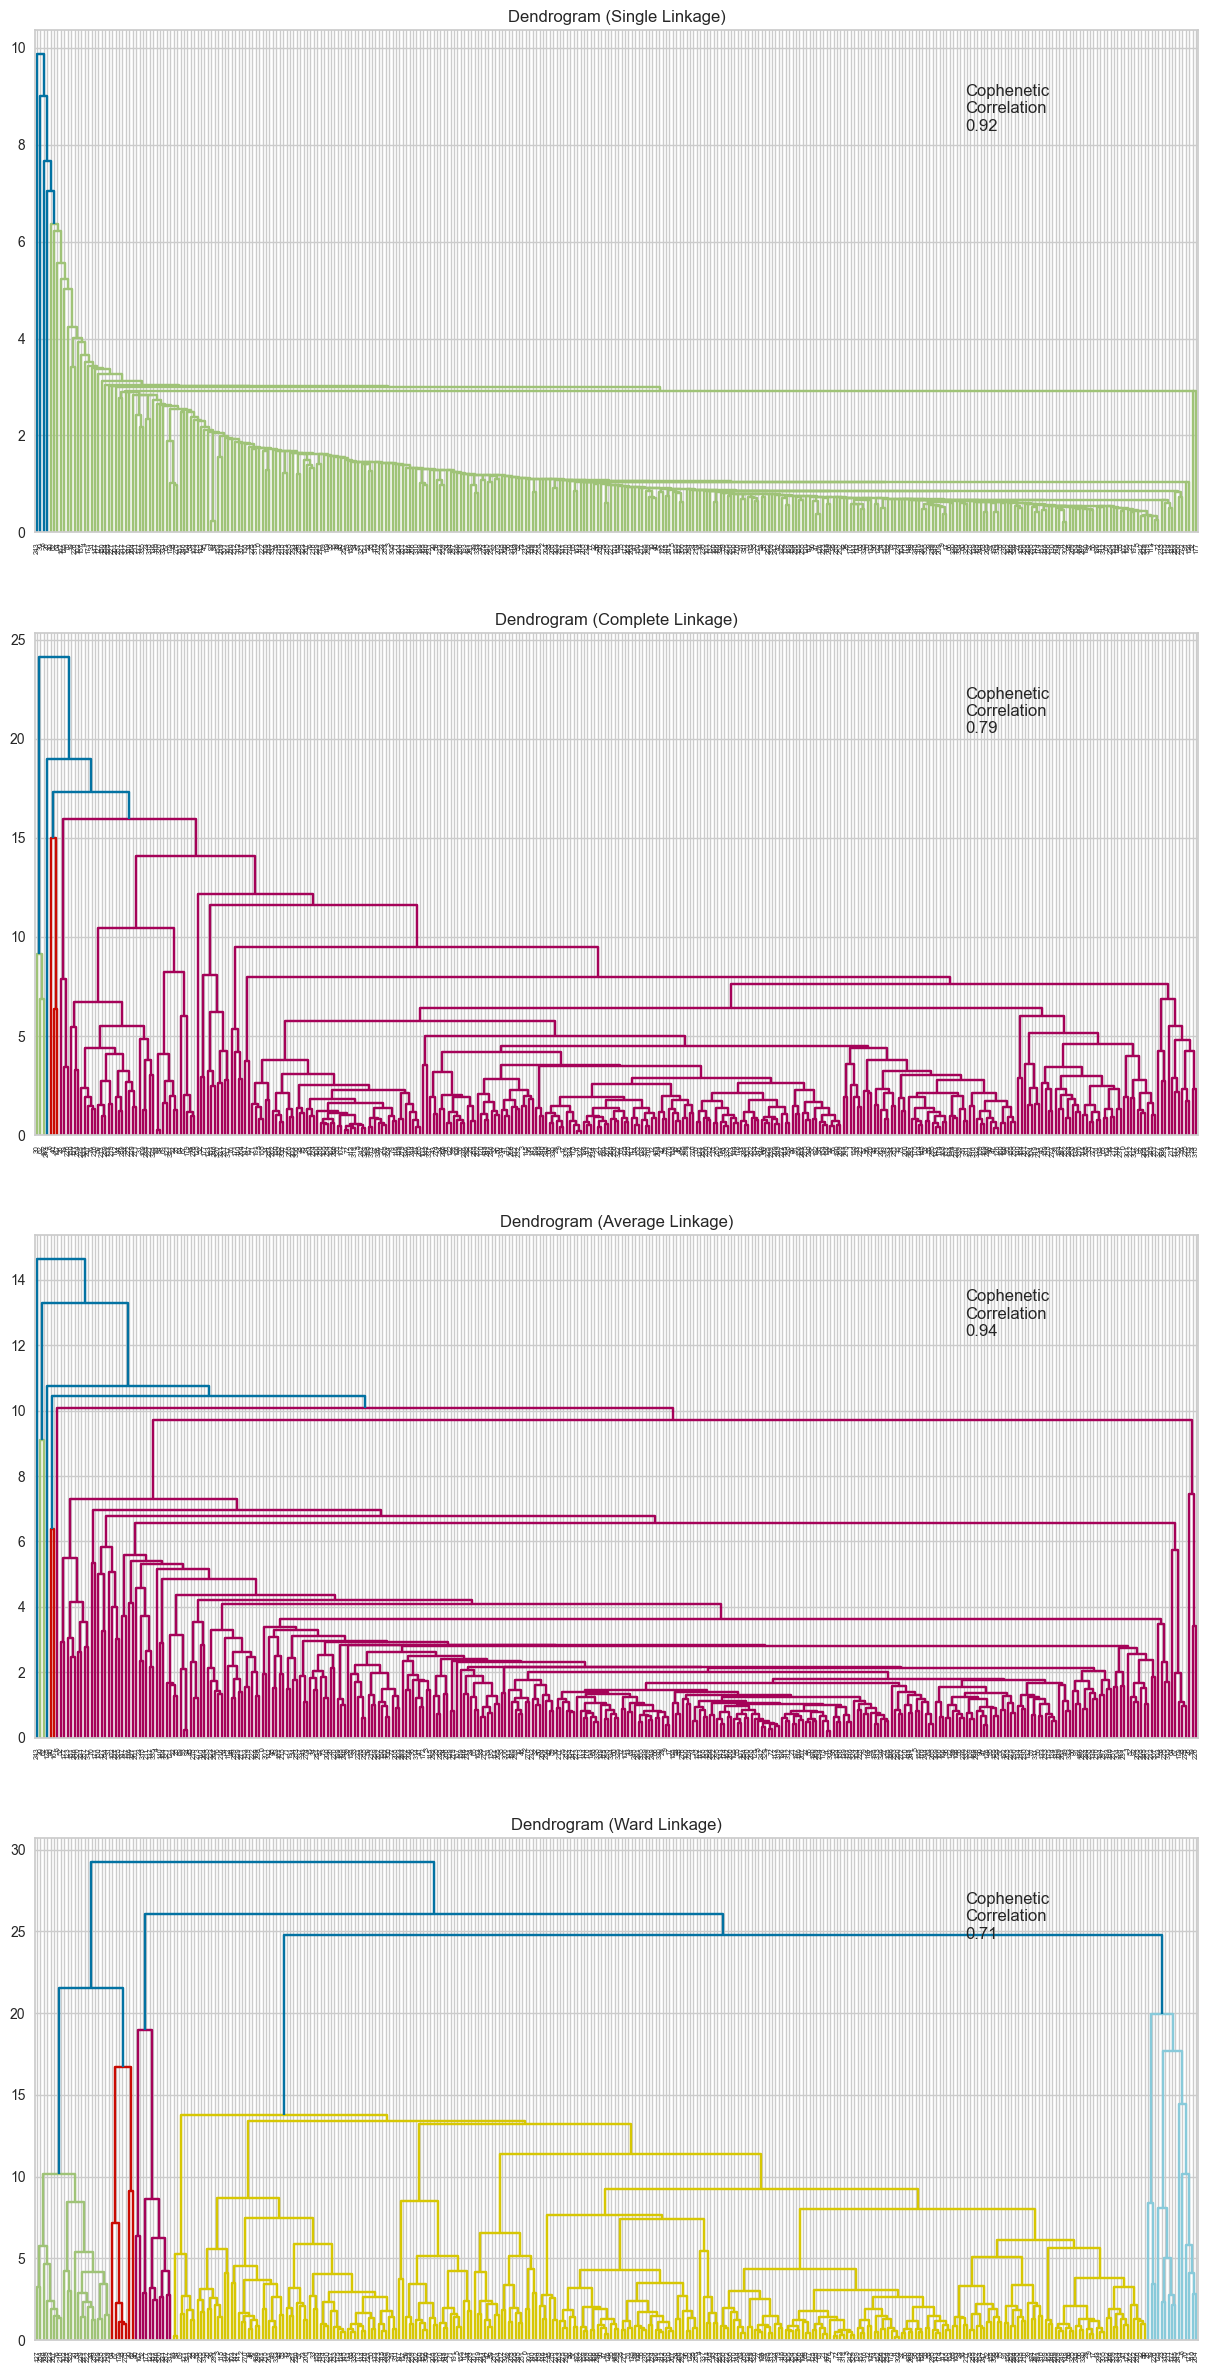

In [90]:
# Checking Dendrograms 

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward'] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

* Ward linkage appears to be the most balanced and appropriate to use. We’re going to slice the data into 4 clusters.

In [92]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
3,ward,0.710118
1,complete,0.787328
0,single,0.923227
2,average,0.942254


In [93]:
# Creating model using sklearn
n_clusters = 4
affinity = 'euclidean'
linkage = 'ward'
HCmodel = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [94]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [95]:
# Cluster Profiling
hc_cluster_profile = df2.groupby("HC_segments").mean()

hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


In [96]:
# Printing the companies in each cluster
for cl in df2["HC_segments"].unique():  # Replace "HC_segments" with your actual cluster label column if different
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())  # Same here
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [97]:
# Counting the companies in each cluster by the segment.
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

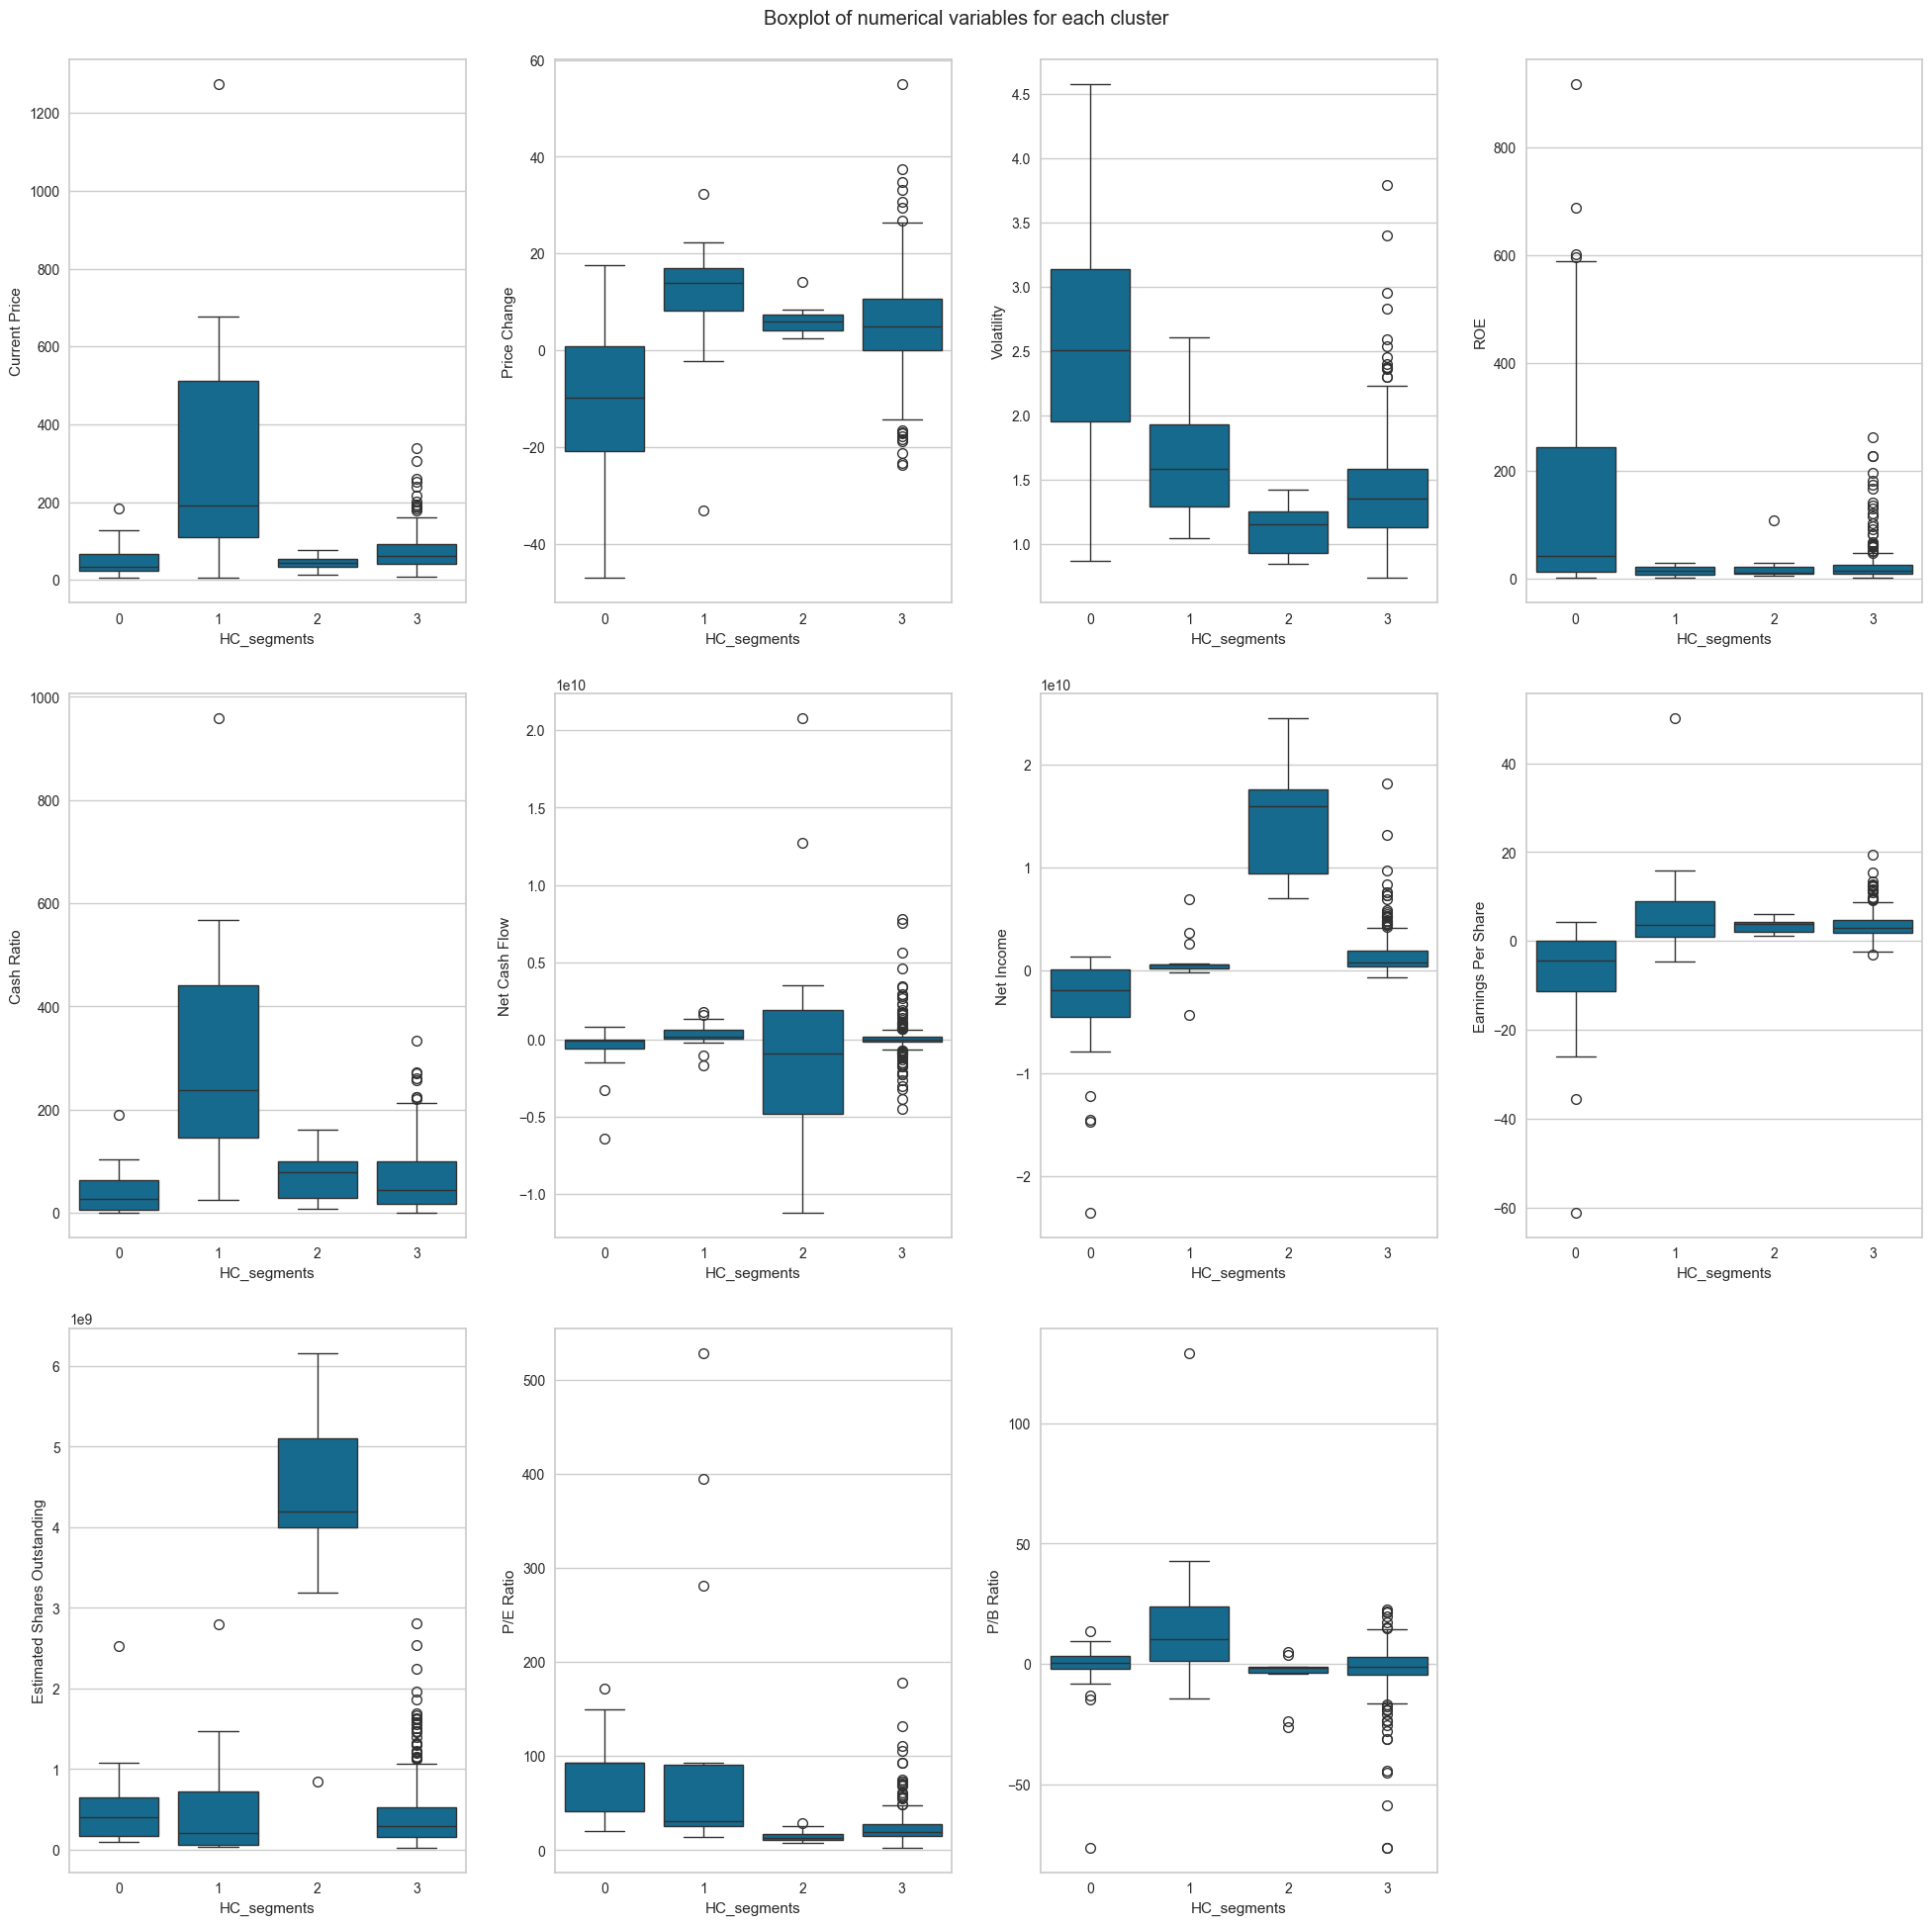

In [98]:
# Visualizing cluster data with a boxplot.
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### Cluster Insights for Hierarchical Clustering

#### Cluster 0
* Low current price 48.01 with a significant negative price change -11.26% suggests challenges for these companies.
* High ROE (196.55%) indicates effective management, but negative net income (-$3.60 billion) raises concerns about financial health.
* Moderate size with 29 companies, reflecting a segment of struggling firms with strong returns.

#### Cluster 1
* High current price 326.20 and positive price change (+10.56%) indicate strong performance and investor confidence.
* Lower volatility (1.64) and positive net income ($864.50 million) suggest financial health and stability.
* Smaller size (15 companies) likely represents niche firms with premium valuations.

#### Cluster 2
* Low current price 42.85 and positive price change (+6.27%) signal potential for value investors.
* Good ROE (22.73%) and strong net income ($14.63 billion) indicate solid fundamentals.
* Smallest cluster with 11 companies, suggesting select firms with promising performance.

#### Cluster 3
* Current price 72.76 with moderate growth (+5.21%) and volatility (1.43) indicates mixed investor sentiment.
* Strong ROE (25.60%) and positive net income ($1.54 billion) suggest financial stability.
* Largest cluster (285 companies), indicating a diverse range of firms with varying risk profiles.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

#### Execution Time
* K-Means is faster in execution as it uses a simple iterative approach to minimize within-cluster variance.
* Both techniques produced 4 distinct clusters. However, K-Means clusters appeared more balanced in size, while Hierarchical Clustering exhibited more variability in cluster sizes and characteristics.
* Overall, the first and last clusters show the most significant overlap in observations.
Cluster 0 (HC) and Cluster 3 (KM): 29 observations
Cluster 1 (HC) and Cluster 1 (KM): 1 observation
Cluster 2 (HC) and Cluster 2 (KM): 9 observations
Cluster 3 (HC) and Cluster 0 (KM): 23 observations
* Both algorithms suggest that 4 clusters are appropriate for this dataset.

## Actionable Insights and Recommendations

1. Leverage the distinct clusters identified in both clustering techniques to tailor investment strategies. Focus on high-performing sectors like technology and healthcare in clusters with strong financial metrics, while approaching energy sectors with caution due to higher volatility.

2. Promote diversification across different clusters to mitigate risk. Balance investments in high-risk sectors like energy with more stable sectors like consumer staples and healthcare.

3. Continuously monitor the companies within each cluster to identify shifts in performance or changes in market conditions. This proactive approach allows for timely adjustments to the portfolio based on emerging trends.

4. Incorporate insights from clustering analyses into regular financial assessments. This ensures alignment with the evolving market landscape and enhances data-driven decision-making.
-